# Demonstration
---
### [Warning] Change the path to yours!
If you don't have 1. dataset 2. saved model, you have to download and train model first!
the dataset can be download from [link](http://www.cvlibs.net/datasets/kitti/eval_road.php)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import torch
import scipy.misc
from matplotlib import pyplot
import os 
import numpy as np
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from data_helper import (MyDataset, denormal, toRGB)
from FCN import FCN

In [2]:
batch_size, n_class, h, w = 10, 2, 224, 320
image_shape = (h, w, 3)
# please download dataset and training the model first
home = os.path.expanduser('~')
data_dir = os.path.join(home, 'workspace', 'deeplearning', 'dataset', 'kitti', 'data_road')
saved_model_dir = os.path.join(home, 'workspace', 'deeplearning', 'FCN', 'saved', 'FCNs_new.pth')
own_state_dict = torch.load(saved_model_dir)

myTestDataset = MyDataset(data_dir, image_shape=image_shape, isTrain=False, n_class=n_class)
myTestDataLoader = DataLoader(myTestDataset, batch_size=batch_size, shuffle=True)

_test_batch = next(iter(myTestDataLoader))

In [3]:
fcn = FCN(n_class=2)
fcn.load_state_dict(own_state_dict)

In [4]:
_X = _test_batch['X']
outputs = fcn(_X)
outputs = outputs.data.cpu().numpy()

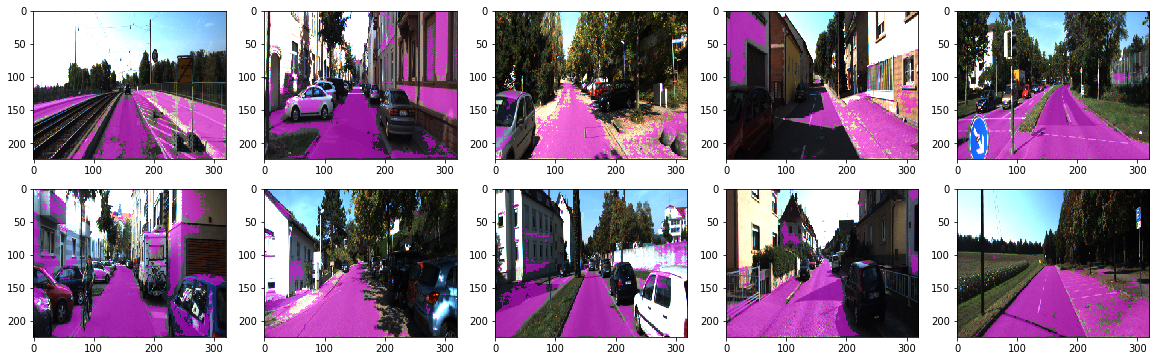

In [5]:
threshold = 0.7 # gap of probability
_cls_id = 1 # road

fig, ax = pyplot.subplots(2, 5, figsize=(20, 6))
dinputs = denormal(_X)
dinputs = toRGB(dinputs, dtype=np.uint8)
for i in range(10):
    N, H, W = outputs[i].shape
    # raw
    street_im = Image.fromarray(dinputs[i])
    # semantic road
    im_softmax = outputs[i].transpose(1, 2, 0)[:, :, _cls_id]
    segmentation = (im_softmax > threshold).reshape(H, W, 1)
    # mask
    mask = np.dot(segmentation, np.array([[255, 0, 255, 127]]))
    mask = np.round(mask).astype(np.uint8)
    mask = Image.fromarray(mask, mode="RGBA")
    # paste
    street_im.paste(mask, box=None, mask=mask)
    ax[i//5][i%5].imshow(street_im, aspect='auto')
pyplot.show()

#### personnal record
Rename keys in state_dict()
```
own_state_dict = torch.load(os.path.join('saved', 'FCNs.pth'))
_own_state_dict = {k.replace('.features.', '.'): v for k, v in own_state_dict.items() if k in own_state_dict}
```